# Speech Emotion Recognition - Male

In [1]:
%pip install numpy==1.24

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np

## Data Collection

In [4]:
data = pd.read_csv("features.csv")

In [5]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,spent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,labels
0,-637.701233,104.299019,4.894947,20.494011,12.552954,2.851410,-6.633390,-4.091278,-10.423918,-6.406950,...,0.172893,-1.170210,-5.292450,-0.573319,1.019471,-3.492607,-3.468123,-1.214944,1.971239,male_calm
1,-596.908460,86.871936,9.470162,17.109819,11.198966,1.541056,-6.677264,-5.755428,-9.684472,-6.891256,...,0.033803,-1.986515,-5.103855,-1.253110,0.514896,-3.268317,-4.502895,0.167153,0.256732,male_calm
2,-698.086548,99.795929,1.892679,19.915264,7.532868,1.265761,-9.188656,-5.798194,-12.299710,-4.976400,...,-1.639542,-2.603761,-4.890347,-0.879222,-1.250208,-3.449960,-4.708529,-0.086224,-3.034044,male_calm
3,-279.141052,41.092949,-21.319229,7.802911,-13.140503,-9.407660,-15.580647,-6.097223,-24.700903,-9.640293,...,-10.305976,-4.092835,-5.817179,-10.731523,-0.823596,-15.885103,-2.014258,-6.173852,-5.331760,male_angry
4,-160.074686,17.576058,-2.147436,3.133417,-4.745002,-6.510771,-5.911591,-4.481506,-9.470598,-5.907823,...,-4.088007,-1.817639,-2.994765,-4.893176,-2.880436,-7.163400,-2.147345,-2.359248,-3.746217,male_angry


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
meanfreq,4320.0,-487.003996,136.291809,-839.943481,-584.871048,-493.733840,-392.564923,-81.179808
sd,4320.0,52.347325,23.301751,-15.569962,32.756441,52.938862,69.891104,117.403458
median,4320.0,-6.899311,16.316507,-79.263588,-16.253773,-4.516660,4.681348,30.102003
Q25,4320.0,7.564491,9.501292,-36.626686,1.014772,6.905284,13.967491,38.804756
Q75,4320.0,-2.946746,9.863238,-42.949089,-8.933470,-2.113036,3.681489,25.467150
IQR,4320.0,-7.424758,8.204065,-41.675949,-12.121491,-6.581761,-2.204921,19.140991
skew,4320.0,-9.849076,7.280637,-34.720089,-14.668655,-9.012351,-4.521343,11.820717
kurt,4320.0,-11.586352,6.673772,-36.939785,-16.202100,-10.471962,-6.650337,8.074190
spent,4320.0,-10.100073,5.833754,-38.967739,-13.316231,-9.068425,-6.205477,9.730897
sfm,4320.0,-3.638752,4.520046,-26.159826,-6.156888,-3.794484,-1.066079,37.959518


## Selecting only Male Voices

In [7]:
lst = ['angry', 'fear', 'calm', 'happy', 'sad']
data1 = pd.DataFrame()
for i in lst:
    data2 = data[data['labels'] == 'male_'+i]
    data1= pd.concat([data1, data2], ignore_index = True)

In [8]:
label = np.array(data1['labels'])
for i in range(len(label)):
    label[i] = label[i].split('_')[1]
label
data1['labels'] = label

In [9]:
data1.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,spent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,labels
0,-279.141052,41.092949,-21.319229,7.802911,-13.140503,-9.407660,-15.580647,-6.097223,-24.700903,-9.640293,...,-10.305976,-4.092835,-5.817179,-10.731523,-0.823596,-15.885103,-2.014258,-6.173852,-5.331760,angry
1,-160.074686,17.576058,-2.147436,3.133417,-4.745002,-6.510771,-5.911591,-4.481506,-9.470598,-5.907823,...,-4.088007,-1.817639,-2.994765,-4.893176,-2.880436,-7.163400,-2.147345,-2.359248,-3.746217,angry
2,-331.021576,39.745705,-22.860626,6.353040,-16.374424,-11.440884,-17.602816,-9.509995,-27.061333,-6.779751,...,-9.512968,-3.978928,-8.940723,-9.396315,-3.595846,-16.388462,1.839664,-6.579001,-1.339286,angry
3,-443.611084,66.393280,-4.908761,13.365289,-0.683898,-4.739338,-7.220382,-9.264338,-23.087978,-6.944154,...,-8.101152,-0.350776,-7.457047,-7.318939,1.527056,-14.205444,-1.777708,-3.192659,-6.974279,angry
4,-264.418128,21.537398,6.961810,5.909866,-1.439068,-2.780335,-2.981919,-6.778781,-10.135452,-5.730306,...,-2.728956,-1.569215,-2.639315,-2.652573,-0.214965,-5.719949,-1.584709,-0.551411,-3.866373,angry


## Preprocessing Of Dataset

In [10]:
is_duplicate = data1.duplicated(keep=False)
is_duplicate.value_counts()

False    1436
True        4
dtype: int64

In [11]:
data1 = data1.drop_duplicates()

In [12]:
data1.shape

(1438, 21)

In [13]:
data1.shape

(1438, 21)

In [14]:
data1['labels'] = data1['labels'].replace({'angry' : 0, 'fear' : 1, 'happy' : 2, 'sad' : 3, 'calm' : 4})

In [15]:
data1.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,spent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,labels
0,-279.141052,41.092949,-21.319229,7.802911,-13.140503,-9.407660,-15.580647,-6.097223,-24.700903,-9.640293,...,-10.305976,-4.092835,-5.817179,-10.731523,-0.823596,-15.885103,-2.014258,-6.173852,-5.331760,0
1,-160.074686,17.576058,-2.147436,3.133417,-4.745002,-6.510771,-5.911591,-4.481506,-9.470598,-5.907823,...,-4.088007,-1.817639,-2.994765,-4.893176,-2.880436,-7.163400,-2.147345,-2.359248,-3.746217,0
2,-331.021576,39.745705,-22.860626,6.353040,-16.374424,-11.440884,-17.602816,-9.509995,-27.061333,-6.779751,...,-9.512968,-3.978928,-8.940723,-9.396315,-3.595846,-16.388462,1.839664,-6.579001,-1.339286,0
3,-443.611084,66.393280,-4.908761,13.365289,-0.683898,-4.739338,-7.220382,-9.264338,-23.087978,-6.944154,...,-8.101152,-0.350776,-7.457047,-7.318939,1.527056,-14.205444,-1.777708,-3.192659,-6.974279,0
4,-264.418128,21.537398,6.961810,5.909866,-1.439068,-2.780335,-2.981919,-6.778781,-10.135452,-5.730306,...,-2.728956,-1.569215,-2.639315,-2.652573,-0.214965,-5.719949,-1.584709,-0.551411,-3.866373,0


In [16]:
x_data = data1.drop(columns = 'labels', axis = 1)

In [17]:
y_data = data1['labels']

In [18]:
x_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,spent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,-279.141052,41.092949,-21.319229,7.802911,-13.140503,-9.407660,-15.580647,-6.097223,-24.700903,-9.640293,-5.937896,-10.305976,-4.092835,-5.817179,-10.731523,-0.823596,-15.885103,-2.014258,-6.173852,-5.331760
1,-160.074686,17.576058,-2.147436,3.133417,-4.745002,-6.510771,-5.911591,-4.481506,-9.470598,-5.907823,-2.864403,-4.088007,-1.817639,-2.994765,-4.893176,-2.880436,-7.163400,-2.147345,-2.359248,-3.746217
2,-331.021576,39.745705,-22.860626,6.353040,-16.374424,-11.440884,-17.602816,-9.509995,-27.061333,-6.779751,-7.736475,-9.512968,-3.978928,-8.940723,-9.396315,-3.595846,-16.388462,1.839664,-6.579001,-1.339286
3,-443.611084,66.393280,-4.908761,13.365289,-0.683898,-4.739338,-7.220382,-9.264338,-23.087978,-6.944154,-4.376257,-8.101152,-0.350776,-7.457047,-7.318939,1.527056,-14.205444,-1.777708,-3.192659,-6.974279
4,-264.418128,21.537398,6.961810,5.909866,-1.439068,-2.780335,-2.981919,-6.778781,-10.135452,-5.730306,-2.622335,-2.728956,-1.569215,-2.639315,-2.652573,-0.214965,-5.719949,-1.584709,-0.551411,-3.866373


In [19]:
y_data.value_counts()

0    288
1    288
4    288
3    288
2    286
Name: labels, dtype: int64

## Normalizing the data

In [20]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(x_data)
x_data = pd.DataFrame(scaled_data, columns=x_data.columns)

In [22]:
x_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,spent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.739100,0.294738,0.423166,0.386035,0.305774,0.487672,0.411056,0.561670,0.292962,0.464069,0.423806,0.357832,0.441199,0.267644,0.359708,0.501010,0.179764,0.355220,0.198026,0.177889
1,0.896022,0.077395,0.638232,0.293560,0.456738,0.539659,0.626626,0.611646,0.605708,0.568923,0.524361,0.554126,0.525184,0.354006,0.591410,0.407976,0.529736,0.350592,0.328037,0.227720
2,0.670725,0.282287,0.405875,0.357322,0.247623,0.451184,0.365972,0.456112,0.244492,0.544428,0.364962,0.382866,0.445404,0.172067,0.412697,0.375616,0.159566,0.489246,0.184218,0.303365
3,0.522340,0.528564,0.607255,0.496193,0.529763,0.571449,0.597447,0.463710,0.326082,0.539810,0.474898,0.427436,0.579331,0.217466,0.495140,0.607333,0.247163,0.363446,0.299633,0.126269
4,0.758504,0.114006,0.740417,0.348545,0.516184,0.606604,0.691942,0.540590,0.592055,0.573909,0.532281,0.597030,0.534354,0.364882,0.680331,0.528539,0.587657,0.370158,0.389653,0.223943


In [23]:
y_data.head()

0    0
1    0
2    0
3    0
4    0
Name: labels, dtype: int64

## The values assigned to each emotion after Pre-processing are
### 0 - angry, 1 - fear, 2 - happy, 3 - sad, 4 - calm

## Feature Selection

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA()

In [26]:
pca.fit(x_data)

PCA()

In [27]:
pca.feature_names_in_

array(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'spent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'], dtype=object)

In [28]:
exp_variance = pca.explained_variance_ratio_

In [29]:
exp_variance

array([0.32882433, 0.1976354 , 0.07802403, 0.06604307, 0.05321201,
       0.05041324, 0.0327666 , 0.02865774, 0.02378961, 0.02101776,
       0.01881554, 0.01815383, 0.0155345 , 0.01449428, 0.01211893,
       0.01054892, 0.0095647 , 0.00808431, 0.00661326, 0.00568794])

In [30]:
c = np.cumsum(exp_variance)

In [31]:
c

array([0.32882433, 0.52645973, 0.60448377, 0.67052683, 0.72373884,
       0.77415208, 0.80691868, 0.83557642, 0.85936602, 0.88038378,
       0.89919932, 0.91735315, 0.93288765, 0.94738193, 0.95950086,
       0.97004978, 0.97961448, 0.98769879, 0.99431206, 1.        ])

In [32]:
d = np.argmax(c >= 0.95)+1
d

15

In [33]:
x_data = x_data.iloc[:,:d]

In [34]:
x_data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,spent,sfm,mode,centroid,meanfun,minfun,maxfun
0,0.739100,0.294738,0.423166,0.386035,0.305774,0.487672,0.411056,0.561670,0.292962,0.464069,0.423806,0.357832,0.441199,0.267644,0.359708
1,0.896022,0.077395,0.638232,0.293560,0.456738,0.539659,0.626626,0.611646,0.605708,0.568923,0.524361,0.554126,0.525184,0.354006,0.591410
2,0.670725,0.282287,0.405875,0.357322,0.247623,0.451184,0.365972,0.456112,0.244492,0.544428,0.364962,0.382866,0.445404,0.172067,0.412697
3,0.522340,0.528564,0.607255,0.496193,0.529763,0.571449,0.597447,0.463710,0.326082,0.539810,0.474898,0.427436,0.579331,0.217466,0.495140
4,0.758504,0.114006,0.740417,0.348545,0.516184,0.606604,0.691942,0.540590,0.592055,0.573909,0.532281,0.597030,0.534354,0.364882,0.680331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,0.551404,0.264277,0.755030,0.402418,0.679818,0.659273,0.662518,0.561546,0.626926,0.563559,0.536666,0.543806,0.426487,0.403105,0.736377
1434,0.267457,0.722983,0.551154,0.593872,0.729112,0.641385,0.640173,0.381123,0.569782,0.579023,0.597376,0.420187,0.329129,0.475267,0.559450
1435,0.300857,0.739664,0.586260,0.459516,0.830998,0.651573,0.648955,0.526852,0.528186,0.505057,0.523433,0.488970,0.317377,0.423360,0.550485
1436,0.414975,0.513737,0.656282,0.402718,0.781304,0.653197,0.634789,0.511426,0.545828,0.492373,0.540192,0.485967,0.371969,0.357744,0.649380


## Train Test split

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 123)

## Building a model

### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression(penalty='elasticnet', l1_ratio=0.5 ,multi_class='multinomial', class_weight='balanced', solver='saga')

In [38]:
lr = lr.fit(x_train, y_train)

In [39]:
y_lr_pred = lr.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
print("Accuracy score :", accuracy_score(y_test, y_lr_pred))

Accuracy score : 0.5208333333333334


### Support Vector Machine

In [42]:
from sklearn.svm import SVC

In [43]:
svm = SVC(kernel='rbf', C=10, class_weight='balanced',decision_function_shape='ovr', break_ties=True, shrinking=False, gamma = 15, random_state=42)

In [44]:
svm.fit(x_train, y_train)

SVC(C=10, break_ties=True, class_weight='balanced', gamma=15, random_state=42,
    shrinking=False)

In [45]:
y_svm_pred = svm.predict(x_test)

In [46]:
print("Accuracy score :", accuracy_score(y_test, y_svm_pred))

Accuracy score : 0.8078703703703703


### K Nearest Neighbors

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance',algorithm='brute', p=2, n_jobs=1)

In [49]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', n_jobs=1, n_neighbors=3,
                     weights='distance')

In [50]:
y_knn_pred = knn.predict(x_test)

In [51]:
print("Accuracy score:", accuracy_score(y_test, y_knn_pred))

Accuracy score: 0.7685185185185185


### Naive Bayes

In [52]:
from sklearn.naive_bayes import MultinomialNB

In [53]:
nb = MultinomialNB()

In [54]:
nb.fit(x_train, y_train)

MultinomialNB()

In [55]:
y_nb_pred = nb.predict(x_test)

In [56]:
print("Accuracy score :", accuracy_score(y_test, y_nb_pred))

Accuracy score : 0.28935185185185186


### Deicision Trees

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=123, max_depth=None, max_features=None, min_impurity_decrease= 0.0,
                            class_weight="balanced")

In [59]:
dt = dt.fit(x_train, y_train)

In [60]:
y_dt_pred = dt.predict(x_test)

In [61]:
print("Accuracy score:", accuracy_score(y_test, y_dt_pred))

Accuracy score: 0.5439814814814815


### Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rfc = RandomForestClassifier(n_estimators=300, criterion='entropy', random_state=123, max_depth=None, bootstrap=True, oob_score=True, 
                            max_features=None, min_impurity_decrease= 0.0, class_weight="balanced_subsample")

In [64]:
# Fit the classifier to the training data
rfc.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_features=None, n_estimators=300, oob_score=True,
                       random_state=123)

In [65]:
# Predict on the test set
y_rfc_pred = rfc.predict(x_test)

In [66]:
print("Accuracy score :", accuracy_score(y_test, y_rfc_pred))

Accuracy score : 0.7013888888888888


# The best accuracy is obtained by *Support Vector Machine* algorithm

## Checking for accuracy

In [67]:
print("Accuracy score :", accuracy_score(y_test, y_svm_pred))

Accuracy score : 0.8078703703703703


In [68]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [69]:
precision = precision_score(y_test, y_svm_pred, average = "weighted")
print("Precision :",precision)

Precision : 0.8090112934461593


In [70]:
recall = recall_score(y_test, y_svm_pred, average = "weighted")
print("Recall :",recall)

Recall : 0.8078703703703703


In [71]:
f1 = f1_score(y_test, y_svm_pred, average = "weighted")
print("F1 score :", f1)

F1 score : 0.8072921567676059


In [72]:
svm.classes_

array([0, 1, 2, 3, 4], dtype=int64)

In [73]:
svm.n_features_in_

15

In [74]:
svm.feature_names_in_

array(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'spent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun'],
      dtype=object)

In [75]:
f1_score(y_test, y_svm_pred, average = "weighted")

0.8072921567676059

In [76]:
from sklearn.metrics import precision_score, recall_score

In [77]:
precision = precision_score(y_test, y_svm_pred, average='weighted')
recall = recall_score(y_test, y_svm_pred, average='weighted')

In [78]:
F1 = 2 * (precision * recall) / (precision + recall)

In [79]:
F1

0.8084404293724783

In [87]:
from sklearn.metrics import classification_report

In [88]:
report = classification_report(y_test, y_svm_pred)

In [91]:
print(report)

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       101
           1       0.71      0.67      0.69        70
           2       0.76      0.80      0.78        83
           3       0.79      0.84      0.81        86
           4       0.86      0.91      0.88        92

    accuracy                           0.81       432
   macro avg       0.80      0.80      0.80       432
weighted avg       0.81      0.81      0.81       432



## Confusion Matrix

In [80]:
from sklearn.metrics import confusion_matrix

In [81]:
cm = confusion_matrix(y_test, y_svm_pred)

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

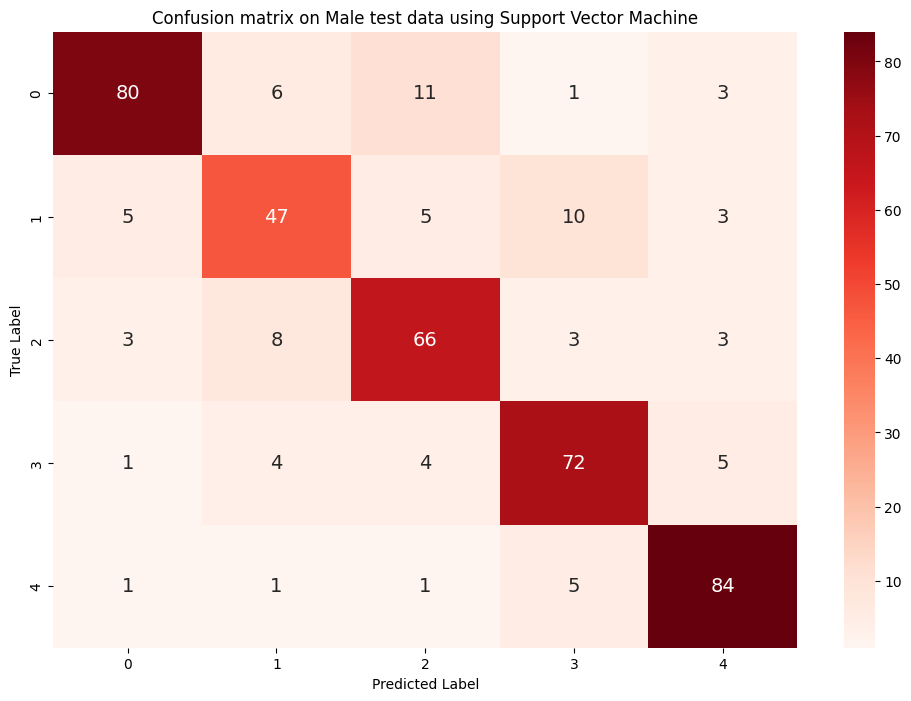

In [83]:
plt.figure(figsize = (12,8))
plt.title("Confusion matrix on Male test data using Support Vector Machine")
sns.heatmap(cm, annot = True, fmt = 'd', cmap = plt.cm.Reds, cbar = True, annot_kws = {'size' : 14})
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Saving the ML model using joblib

In [84]:
import joblib

In [85]:
# with open('svm_male_joblib.joblib', 'wb') as file:
#     joblib.dump(svm, file)

In [86]:
with open('svm_male_joblib.joblib', 'rb') as file:
    loaded_model = joblib.load(file)